In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

import numpy as np
import pandas as pd
from sklearn import model_selection, svm, preprocessing, metrics, ensemble
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## support vector classification

In [3]:
#read in the data with numerical features
data = pd.read_csv('data/transformed_data_num.csv',index_col=0)
data.dropna(inplace=True)

In [4]:
data.head()

,outcometype,animaltype,sex,age,year,month,weekday,neutralized,colormix,breedmix,apricot,black,blue,brindle,brown,buff,calico,chocolate,cream,fawn,flame,gold,gray,lilac,liver,lynx,merle,orange,point,red,sable,seal,silver,smoke,tabby,tan,tick,tiger,torbie,tortie,tricolor,white,yellow,affenpinscher,airedale,akita,alaskan,american,anatol,angora,apso,argentino,australian,basenji,basset,bay,beagle,beauceron,belgian,bernard,bernese,bichon,black.1,bloodhound,blue.1,bluetick,bobtail,border,boston,boxer,brittany,bruss,bull,bulldog,bullmastiff,cairn,cane,cardigan,carolina,catahoula,cattle,cavalier,chesa,chihuahua,chinese,chow,coat,coated,cocker,collie,coon,coonhound,corgi,corso,cur,dachshund,dalmatian,dane,doberman,dog,dogo,domestic,dutch,english,eskimo,feist,finnish,flat,fox,french,frise,german,golden,great,greyhound,griffon,hair,harrier,havanese,heeler,highland,himalayan,hound,husky,inu,irish,italian,jack,japanese,kelpie,labrador,lacy,landseer,leonberger,lhasa,longhair,maine,malamute,malinois,maltese,manchester,manx,mastiff,medium,miniature,mountain,mouth,newfoundland,norfolk,norwich,papillon,parson,patterdale,pbgv,pekingese,pembroke,persian,pharaoh,pinsch,pinscher,pit,plott,pointer,pomeranian,poodle,pug,pyrenees,queensland,ragdoll,rat,redbone,retr,retriever,rhod,ridgeback,rottweiler,rough,russell,russian,schipperke,schnauzer,sharpei,sheepdog,shepherd,shetland,shiba,shih,shorthair,siamese,siberian,silky,smooth,snowshoe,soft,span,spaniel,spitz,springer,st,staffordshire,standard,swedish,terr,terrier,tibetan,toy,treeing,tzu,vallhund,vizsla,walker,weimaraner,welsh,west,wheaten,whippet,wire,wirehair,wolfhound,yorkshire
AnimalID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Return_to_owner,1.0,0.0,0.090683,0.333333,0.090909,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Euthanasia,0.0,1.0,0.090683,0.000000,0.818182,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Adoption,1.0,0.0,0.181614,0.666667,0.000000,0.833333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
#prepare data
X = np.array(data.drop('outcometype',axis=1))
Y = np.array(data.outcometype)

Y = Y == 'Adoption' #for binary classification of adoption

x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,train_size=0.7)

In [12]:
#search for a good model
svc = svm.SVC()

gammas = cs = np.array([0.03, 0.1, 0.3, 1, 3])

lin_dict = {'kernel':['linear'], 'C':cs}
rbf_dict =  {'kernel':['rbf'], 'gamma':gammas, 'C':cs}

clf = model_selection.GridSearchCV(svc, param_grid=[lin_dict, rbf_dict], n_jobs=-1)

clf.fit(x_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

results = pd.DataFrame(clf.cv_results_)

results

/Applications/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.7422406729611699
{'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.778057,0.179429,0.627024,0.038347,0.03,linear,NaN,"{'C': 0.03, 'kernel': 'linear'}",0.724834,0.737237,0.736372,0.721373,0.725620,0.729087,0.006467,13
1,10.221346,0.730497,0.658713,0.027630,0.1,linear,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.730603,0.737814,0.739833,0.726853,0.728217,0.732664,0.005210,10
2,10.091251,0.396100,0.618805,0.029165,0.3,linear,NaN,"{'C': 0.3, 'kernel': 'linear'}",0.732910,0.735506,0.736948,0.727142,0.731679,0.732837,0.003400,9
3,11.266181,0.449342,0.498961,0.069316,1.0,linear,NaN,"{'C': 1.0, 'kernel': 'linear'}",0.732622,0.734929,0.735795,0.725411,0.732545,0.732260,0.003653,11
4,15.057964,1.848987,0.689746,0.144149,3.0,linear,NaN,"{'C': 3.0, 'kernel': 'linear'}",0.732910,0.734064,0.736660,0.724546,0.732545,0.732145,0.004064,12
5,9.635997,0.779112,1.454566,0.071683,0.03,rbf,0.03,"{'C': 0.03, 'gamma': 0.03, 'kernel': 'rbf'}",0.686184,0.703490,0.694260,0.680704,0.694749,0.691877,0.007824,25
6,10.445543,0.244007,1.405738,0.093286,0.03,rbf,0.1,"{'C': 0.03, 'gamma': 0.1, 'kernel': 'rbf'}",0.708970,0.723392,0.719931,0.714739,0.710906,0.715588,0.005407,20
7,11.411592,0.127574,1.411034,0.075907,0.03,rbf,0.3,"{'C': 0.03, 'gamma': 0.3, 'kernel': 'rbf'}",0.721085,0.725123,0.729738,0.725123,0.712060,0.722625,0.005951,18
8,12.056416,0.262757,1.549618,0.150237,0.03,rbf,1.0,"{'C': 0.03, 'gamma': 1.0, 'kernel': 'rbf'}",0.652437,0.637439,0.640900,0.634554,0.637911,0.640648,0.006229,29
9,11.755996,0.166600,1.520279,0.026420,0.03,rbf,3.0,"{'C': 0.03, 'gamma': 3.0, 'kernel': 'rbf'}",0.611480,0.601096,0.605134,0.605423,0.608482,0.606323,0.003487,30


In [13]:
#training score
clf.score(x_train,y_train)

0.765893619476174

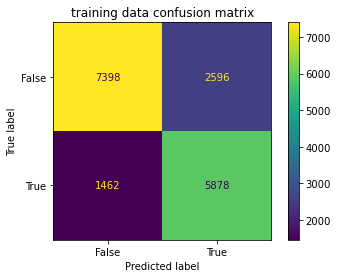

In [14]:
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_train,y_train)
plt.title('training data confusion matrix')
plt.show()

In [15]:
#testing score
clf.score(x_test,y_test)

0.746971736204576

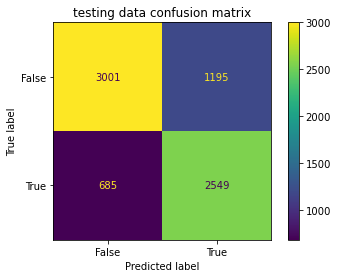

In [16]:
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test)
plt.title('testing data confusion matrix')
plt.show()

## random forest

In [6]:
#search a good model
tr = ensemble.RandomForestClassifier()

clf = model_selection.GridSearchCV(tr, param_grid={'max_depth':range(10,26)}, n_jobs=-1)

clf.fit(x_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

results = pd.DataFrame(clf.cv_results_)

results

0.7647399244146984
{'max_depth': 16}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.772190,0.036238,0.199932,0.009872,10,{'max_depth': 10},0.766945,0.762331,0.757716,0.758292,0.761685,0.761394,0.003315,14
1,3.647173,0.442086,0.232131,0.045635,11,{'max_depth': 11},0.769541,0.763484,0.756850,0.761754,0.763993,0.763125,0.004082,7
2,3.377537,0.061108,0.279763,0.065291,12,{'max_depth': 12},0.769253,0.767234,0.758004,0.759735,0.760531,0.762951,0.004444,8
3,4.235908,0.194753,0.369446,0.090811,13,{'max_depth': 13},0.768965,0.767234,0.755985,0.762619,0.761396,0.763240,0.004586,6
4,4.876857,0.091415,0.379515,0.039555,14,{'max_depth': 14},0.768388,0.766945,0.760600,0.761177,0.760242,0.763470,0.003469,5
5,5.370327,0.099214,0.376944,0.036356,15,{'max_depth': 15},0.769830,0.762331,0.752235,0.765503,0.759665,0.761913,0.005907,10
6,5.642933,0.459950,0.369881,0.095500,16,{'max_depth': 16},0.771849,0.764926,0.756562,0.763773,0.766590,0.764740,0.004936,1
7,5.507077,0.262179,0.341467,0.048551,17,{'max_depth': 17},0.766369,0.768965,0.760888,0.765503,0.758223,0.763990,0.003888,2
8,5.689917,0.158336,0.323224,0.045715,18,{'max_depth': 18},0.767811,0.771560,0.755120,0.762907,0.760531,0.763586,0.005708,4
9,6.316394,0.153580,0.320191,0.040431,19,{'max_depth': 19},0.768099,0.766945,0.757139,0.764350,0.762550,0.763817,0.003863,3


In [7]:
#training score
clf.score(x_train,y_train)

0.8566978193146417

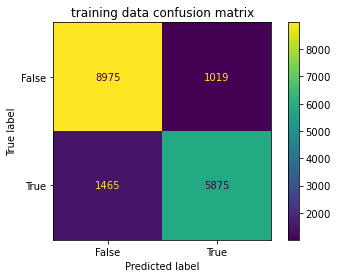

In [9]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_train,y_train,ax=ax)
ax.set_title('training data confusion matrix')
#ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.show()

In [10]:
#testing score
clf.score(x_test,y_test)

0.7687752355316285

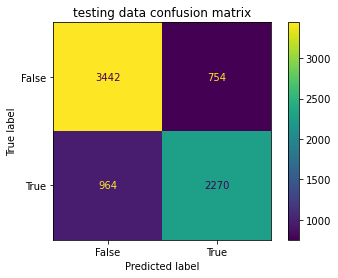

In [11]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,ax=ax)
ax.set_title('testing data confusion matrix')
#ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.show()